# IBM HR Analytics Employee Attrition


Este projeto foi desenvolvido através de um dataset ficticio criado pelos cientistas de dados da IBM e tem como objetivo investigar fatores que levam ao atrito de funcionarios, bem como desenvolver um modelo de Machine Learning capaz de prever se os funcionarios tendem a sair da empresa ou nao.

Um dos grandes desafios para as empresas é contratar e reter talentos. Com um mundo cada vez mais globalizado e competitivo, ter uma equipe de trabalho boa e motivada significa dentre vários outros beneficios economizar dinheiro e tempo com demissoes, contratacoes e treinamentos, por exemplo.

Neste projeto, será testado alguns algoritmos supervisionados para em seguida, ser escolhido o melhor algoritmo candidato a partir dos resultados preliminares para entao optimiza-lo ainda mais para melhor modelar os dados. 

O conjunto de dados deste projeto foi retirado do portal Kaggle e pode ser encontrado no link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.


## 1. Exploring the data

Vamos começar importando as bibliotecas necessárias, lendo os dados e verificando o conjunto de dados.

A segunda coluna desse conjunto de dados, 'Attrition', será nossa variável alvo, ou seja a que queremos prever (se um funcionário irá deixar a empresa ou nao). Todas as outras colunas são características de cada funcionário no banco de dados da empresa.

In [2]:
# Importacao das libraries necessarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the dataset
employee_df = pd.read_csv('/users/admin/desktop/datascience/projetos/data science for business package/1. Human Resources Data/Human_Resources.csv')

# Visualizando as primeiras linhas do dataset
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* O dataset possui 35 features(colunas), sendo 26 do tipo numerica e 9 do tipo categórica, além de 1470 linhas.
* O dataset nao possui null values

In [5]:
# Analisando informacoes estatisticas sobre as variaveis numericas
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Transformando algumas variáveis categóricas com conteúdo YES/NO para numéricas 0/1

In [7]:
employee_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
employee_df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [9]:
employee_df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [10]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)


In [11]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


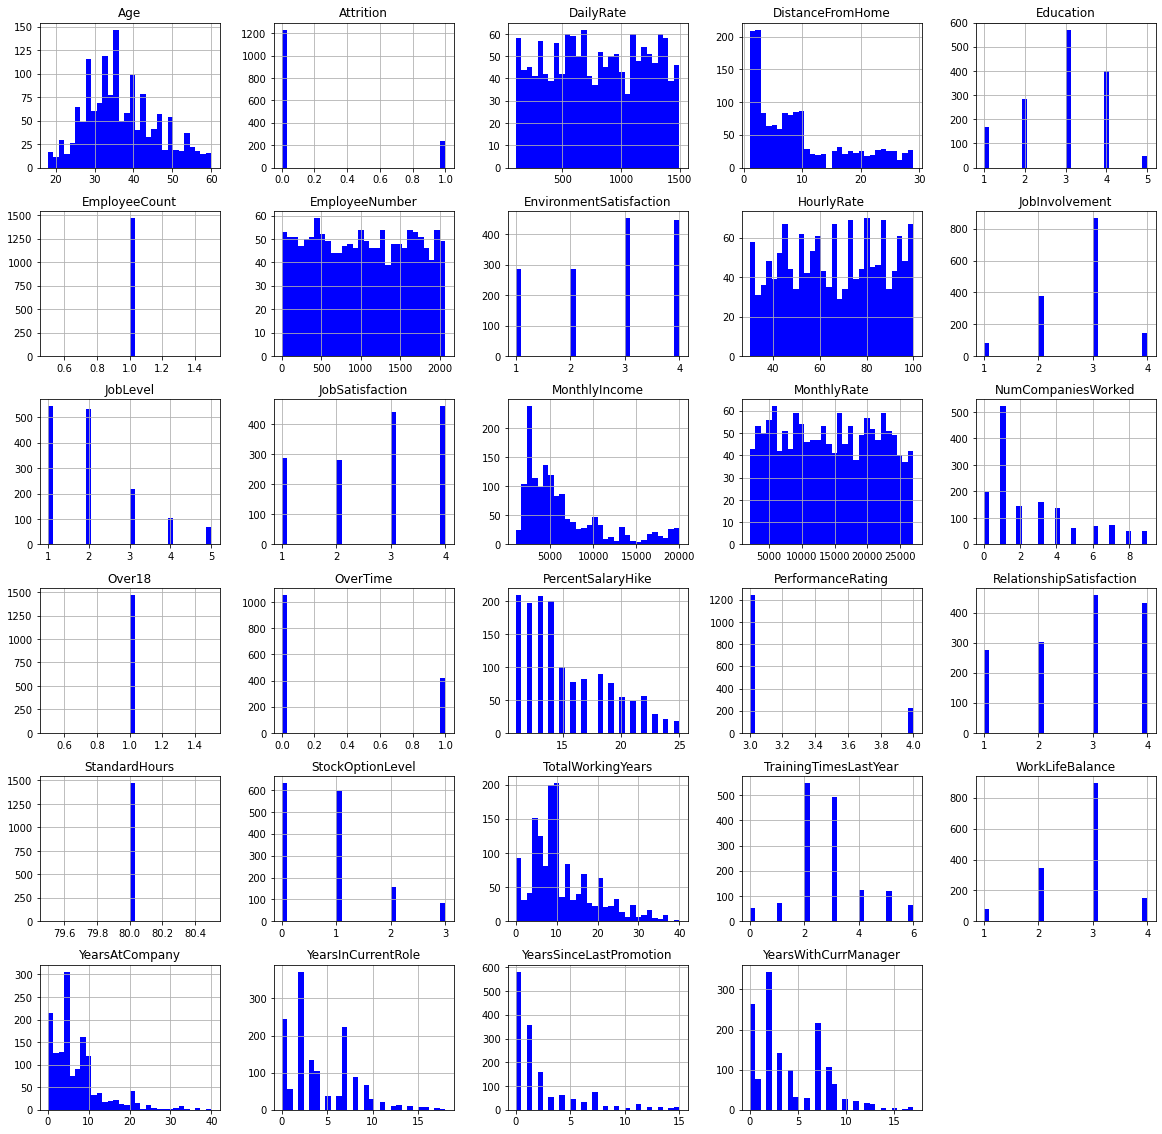

In [12]:
# Plotting a histogram to visualize how each feature is distributed into dataset

employee_df.hist(bins = 30, figsize = (20,20), color = 'b');

* Most of the employees are around between 27 and 40 years old
* Most of the employees live close to work
* Most of the employees have Education level 3
* Most of the employees have less than 10 years working in the company
* Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy

In [13]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [14]:
employee_df.head()
# Now we have 31 columns

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [15]:
# Let's see how many employees left the company! 
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 

print("Total =", len(employee_df))

print("Number of employees who left the company:", len(left_df))
print(f"Percentage of employees who left the company: {1.*len(left_df)/len(employee_df)*100.0:.2f}%") 
print("Number of employees who did not leave the company (stayed) =", len(stayed_df))
print(f"Percentage of employees who did not leave the company (stayed): {1.*len(stayed_df)/len(employee_df)*100.0:.2f}%") 


Total = 1470
Number of employees who left the company: 237
Percentage of employees who left the company: 16.12%
Number of employees who did not leave the company (stayed) = 1233
Percentage of employees who did not leave the company (stayed): 83.88%


In [16]:
# Lets have a look in the statistics of the employees who stayed and left to make some comparisions

left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [17]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000



After comparing the mean and std of the employees who stayed and left we can conclude: 
* Age: mean age of the employees who stayed is higher compared to who left (37.5 x 33.6)
* DailyRate: Rate of employees who stayed is higher (812 x 750)
* DistanceFromHome: Employees who stayed live closer to home (8.9km x 10.6km)
* EnvironmentSatisfaction and JobSatisfaction: Employees who stayed are generally more satisifed with their jobs
* StockOptionLevel: Employees who stayed tend to have higher stock option level


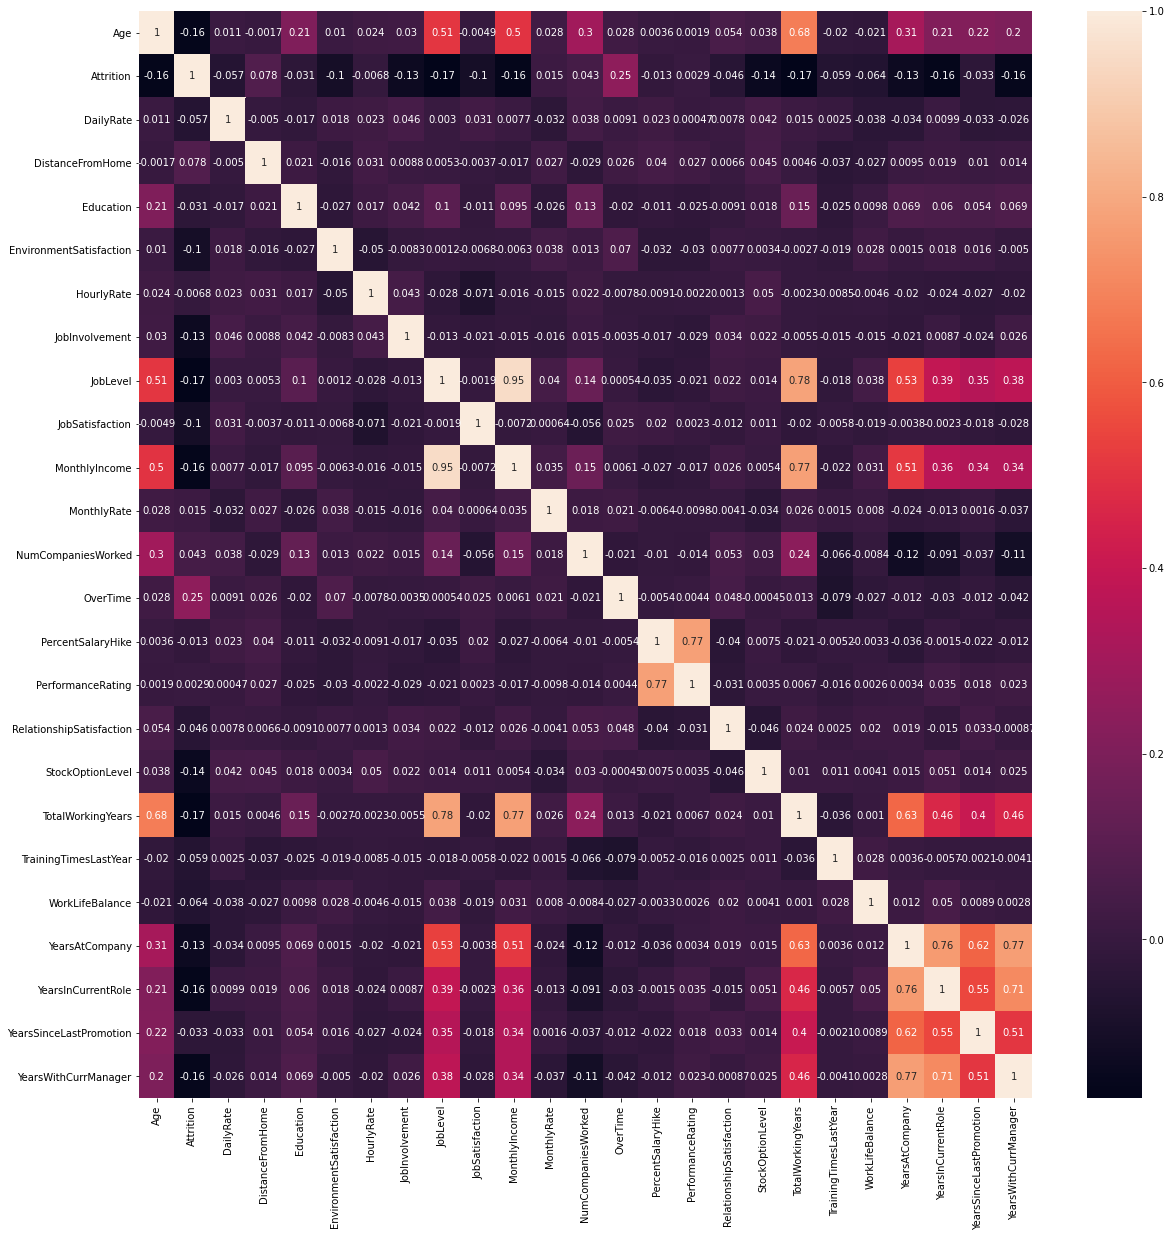

In [18]:
# Lets have a look in the different correlations between the features

correlations = employee_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

Verificar a correlacao entre variaveis é de extrema importancia para conseguir ter uma visao mais ampla sobre os dados e como eles se relacionam entre si

The lighter the color the more positive it correlates

* Job level is strongly correlated with total working years
* Monthly income is strongly correlated with Job level
* Monthly income is strongly correlated with total working years

* Age is stongly correlated with monthly income

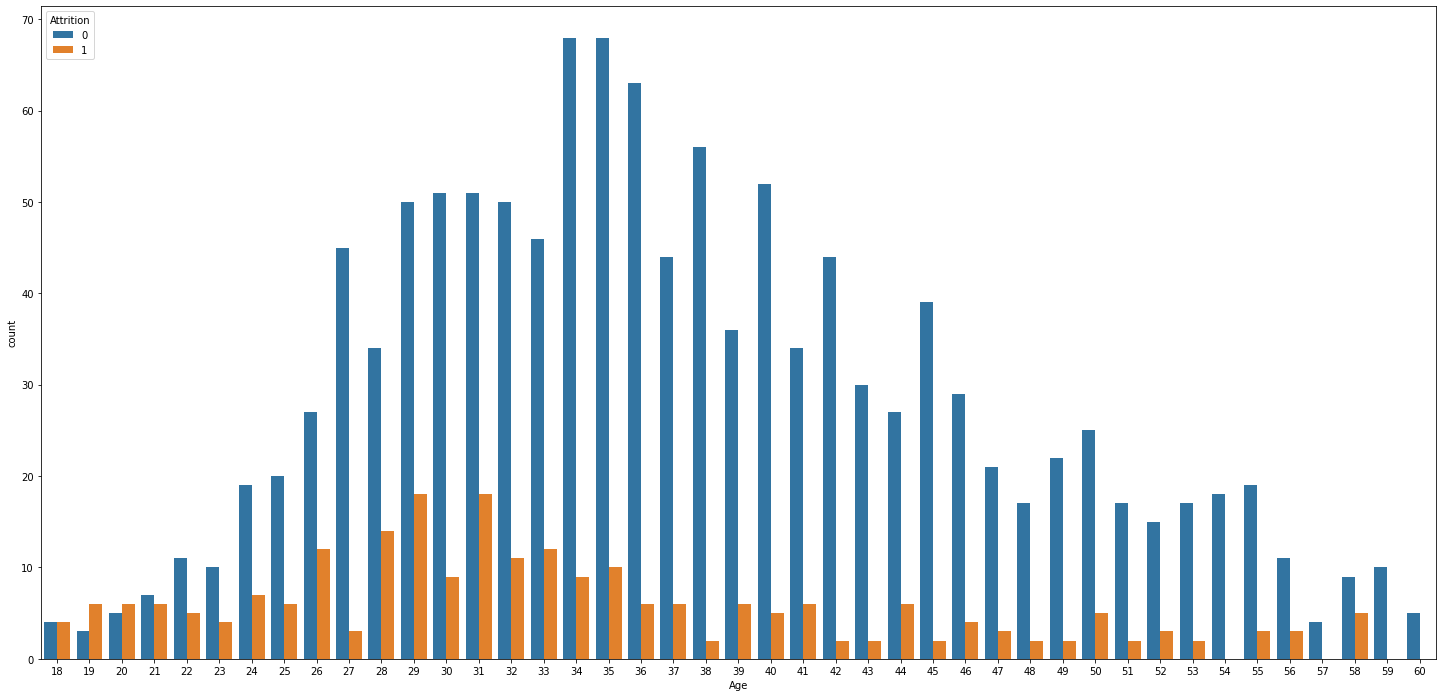

In [19]:
# Lets investigate if there is any correlation between people who left the company with some specific variables such as 'Age', 'JobRole', 'MaritalStatus', 'JobInvolvement' and 'JobLevel'

plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df);

Na cor azul é representado os employees que ficaram, laranja os que deixaram a empresa.
* Até os 31 anos de idade está concentrado o maior número de empregados que deixaram a empresa comparado com os que ficaram; Sendo que na faixa entre 18 e 21 anos estao concentrados o maior numeros de empregados que saem proporcionalmente a quantidade que fica.
* Após os 31 anos, a medida que a idade cresceu observa-se uma diminuicao na quantidade de empregados que deixaram a empresa; 


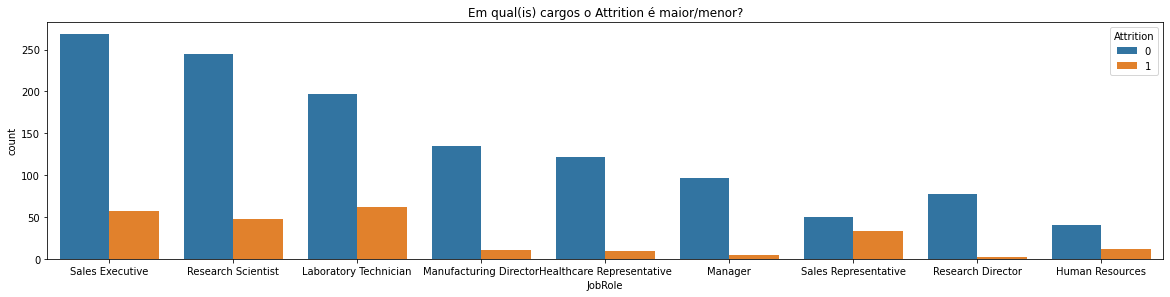

In [20]:
plt.figure(figsize=[20,20])

plt.subplot(411)

sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.title("Em qual(is) cargos o Attrition é maior/menor?");

* Almost half of the team who work in Sales Representative left the company. However a very small number of Reseach Director left.

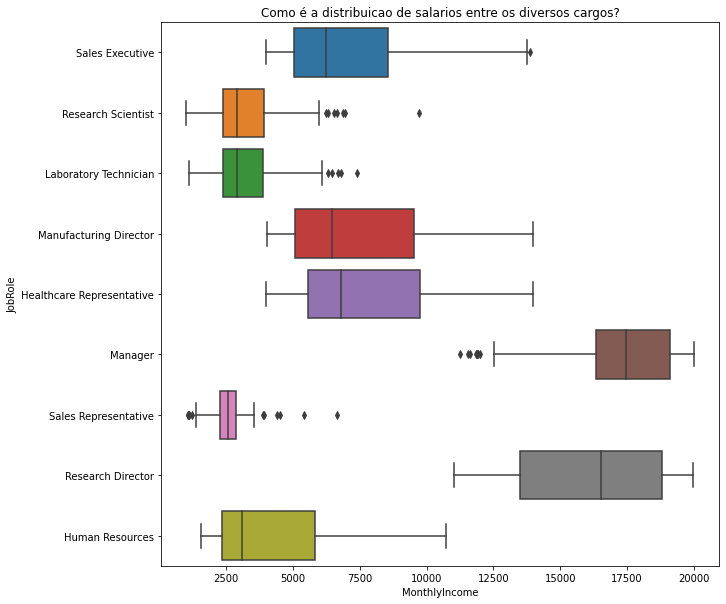

In [21]:
# Let's see the Monthly Income vs. Job Role

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df);
plt.title("Como é a distribuicao de salarios entre os diversos cargos?");

* Sales Representative, Laboratory Technician and Research Scientist are the least paid, while Research Director and Manager are best paid.

* Single employees tend to leave compared to married and divorced

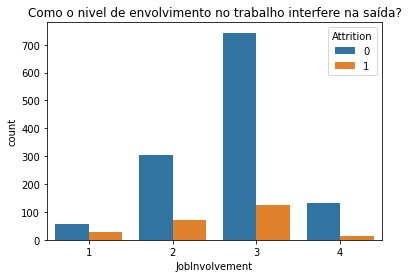

In [22]:
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df);
plt.title("Como o nivel de envolvimento no trabalho interfere na saída?");

* The less employees are involved, the more they tend to leave the company

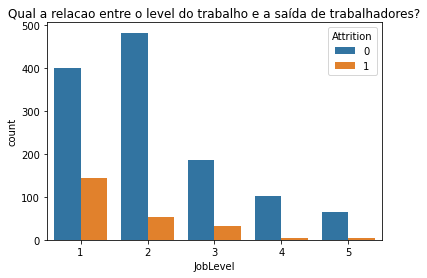

In [23]:
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)
plt.title("Qual a relacao entre o level do trabalho e a saída de trabalhadores?");

* Less experienced (low job level) tend to leave the company 

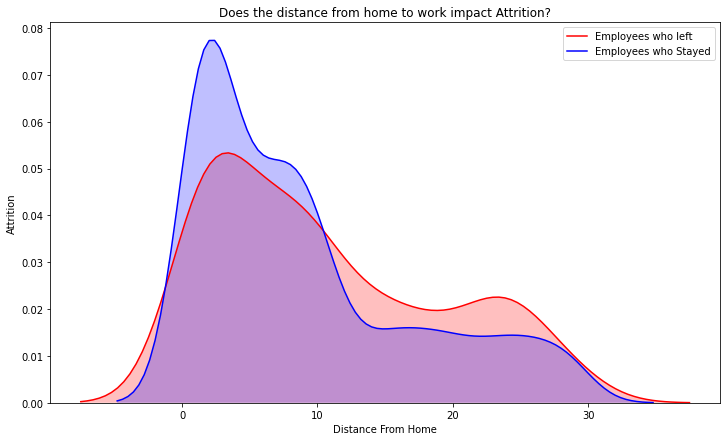

In [55]:
# Let's use KDE (Kernel Density Estimate) to visualize the probability density of a continuous variable.

# Investigating DistanceFromHome

plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')
plt.xlabel('Distance From Home');
plt.ylabel('Attrition');
plt.title("Does the distance from home to work impact Attrition?");

* As the distance from home increases, the number of employees who tends to leave is higher.

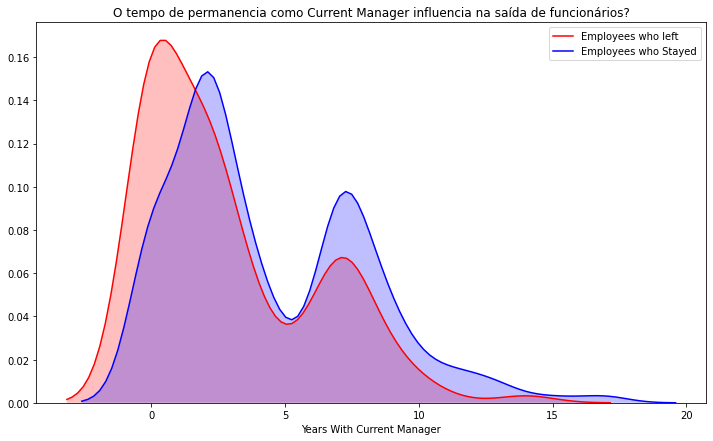

In [25]:
# Investigating YearsWithCurrManager

plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')
plt.xlabel('Years With Current Manager');
plt.title("O tempo de permanencia como Current Manager influencia na saída de funcionários?");

* The shorter the time as a Current Manager, the greater the tendency for employees to leave.

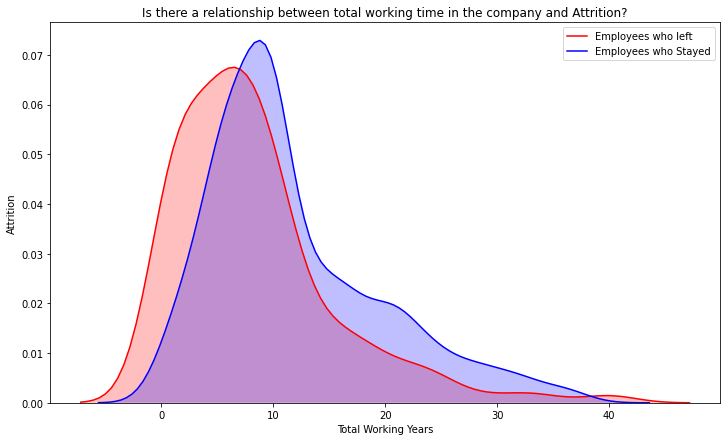

In [56]:
# Investigating TotalWorkingYears

plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')
plt.xlabel('Total Working Years');
plt.ylabel('Attrition');
plt.title("Is there a relationship between total working time in the company and Attrition?");

* The critical period that employees most tend to leave is up to about 7 years working at the company. From there they tend to stay.

## 2. Performing data cleaning

In this process, the main objective is to ensure that the data is correct, consistent and usable, identifying any errors or corruptions in the data, correcting or deleting them, or manually processing them as needed to prevent the error from happening again.

In [27]:
# Checking the types of each feature
employee_df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [28]:
# Separating categorical data from the rest of the dataframe to then convert it to numeric
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


Existem várias diferentes maneiras para converter valores categóricos em numéricos. Em neste projeto vamos utilizar o One Hot Encoder da biclioteca Scikit Learn.

In [29]:
# Converting the categorical features into numbers using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat.shape

(1470, 26)

In [30]:
# Converting into dataframe
X_cat = pd.DataFrame(X_cat)
X_cat 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
# Separating the numerical data
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears'	,'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [32]:
# Concatenating the categorical dataset X_cat and the numerical dataset X_numerical into a unique dataset

X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


Lets use sklearn's MinMaxScaler to transform the data by scaling each resource to an interval between 0 and 1 to ensure that our machine learning model handles the features equally

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [34]:
# Separating the feature that we want to predict

y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## 3. Creating Testing and Training datasets

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape

(1102, 50)

In [36]:
X_test.shape

(368, 50)

## 4. Building, training and evaluating different Machine Learning models

## 4.1 Logistic Regression Classifier

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

In [38]:
# Training the data

model.fit(X_train, y_train)

LogisticRegression()

In [39]:
# Making predictions and visualizing the accuracy

LRC_pred = model.predict(X_test)


print("Accuracy: {}%".format( 100 * accuracy_score(LRC_pred, y_test)))

Accuracy: 88.58695652173914%


In [40]:
# Comparing the results using Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

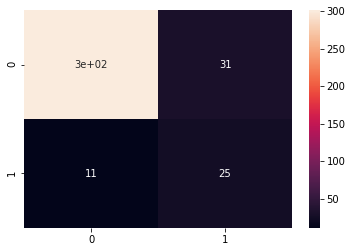

In [41]:
# Testing Set Performance

cm = confusion_matrix(LRC_pred, y_test)
sns.heatmap(cm, annot=True);

* The model was able to correctly classify around 3,000 registers and erroneously classify a very small number of employees

In [42]:
# Analyzing the KPI (Key Performance Indicator)

print(classification_report(y_test, LRC_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       312
           1       0.69      0.45      0.54        56

    accuracy                           0.89       368
   macro avg       0.80      0.71      0.74       368
weighted avg       0.87      0.89      0.88       368



## 4.2 Random Forest Classifier

É também muito utilizado em problemas de classificacao e like its name implies, consists of a large number of individual decision trees that operate as an ensemble.

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [44]:
# Training the data

model.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# Making predictions and visualizing the accuracy

RFC_pred = model.predict(X_test)
print("Accuracy: {}%".format( 100 * accuracy_score(RFC_pred, y_test)))

Accuracy: 85.59782608695652%


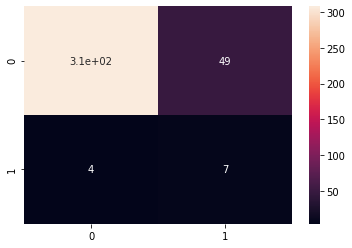

In [46]:
# Testing Set Performance

cm = confusion_matrix(RFC_pred, y_test)
sns.heatmap(cm, annot=True)

In [47]:
# Analyzing the KPI (Key Performance Indicator)

print(classification_report(y_test, RFC_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       312
           1       0.64      0.12      0.21        56

    accuracy                           0.86       368
   macro avg       0.75      0.56      0.56       368
weighted avg       0.83      0.86      0.81       368



## 4.3 K-Nearest Neighbors Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
model = KNeighborsClassifier()

In [50]:
model.fit(X_train, y_train)


KNeighborsClassifier()

In [51]:
KNNC_pred = model.predict(X_test)
print("Accuracy: {}%".format( 100 * accuracy_score(KNNC_pred, y_test)))

Accuracy: 83.69565217391305%


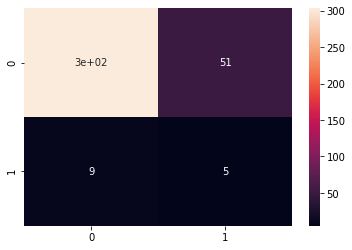

In [52]:
# Testing Set Performance

cm = confusion_matrix(KNNC_pred, y_test)
sns.heatmap(cm, annot=True)

In [53]:
# Analyzing the KPI (Key Performance Indicator)

print(classification_report(y_test, KNNC_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       312
           1       0.36      0.09      0.14        56

    accuracy                           0.84       368
   macro avg       0.61      0.53      0.53       368
weighted avg       0.78      0.84      0.79       368



## 4.4 Artificial Neural Network Classifier

In summary, a Neural Network consists of units (neurons), arranged in layers, which convert an input vector into some output

In [54]:
import tensorflow as tf

/Users/admin/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/admin/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/admin/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/admin/opt/mi

ImportError: cannot import name 'export_saved_model' from 'tensorflow.python.keras.saving.saved_model' (/Users/admin/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/keras/saving/saved_model/__init__.py)

In [ ]:
# Creating the layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training the model

epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

In [ ]:
ANNC_pred = model.predict(X_test)
ANNC_pred = (ANNC_pred > 0.5)
print("Accuracy: {}%".format( 100 * accuracy_score(ANNC_pred, y_test)))

In [ ]:
epochs_hist.history.keys()

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy']);

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_test, ANNC_pred)
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(y_test, ANNC_pred))

# 5. Model evaluation

Após testarmos os quatro modelos chegamos a conclusao que o melhor modelo é o Logistic Regression Classifier com uma accuracy de 89.95%.


In [ ]:
# Showing the results

print("Logistic Regression Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(LRC_pred, y_test)))
print("Random Forest Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(RFC_pred, y_test)))
print("K-Nearest Neighbors Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(KNNC_pred, y_test)))
print("Artificial Neural Network Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(ANNC_pred, y_test)))

# MOSTRAR VISUALMENTE A ACCURACY DE CADA MODELO

# 6. Improving(tuning) our choosen Model

## 6.1 Tuning using GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

# Different hyperparameters  for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=12,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 12 folds for each of 20 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.9s finished


GridSearchCV(cv=12, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [59]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [60]:
# Evaluate the grid search LogisticRegression model
print("Accuracy after tuning with GridSearchCV: {:.2f}%".format(gs_log_reg.score(X_test, y_test)*100))

Accuracy after tuning with GridSearchCV: 88.59%
